In [157]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

from sklearn import svm

In [83]:
df=pd.read_csv("H:\ML\dataset\spam.csv",encoding="ISO 8859-1")

In [84]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


# add non Null values

In [86]:

df.fillna(' ',inplace=True)
df['v2']=df['v2'] + df['Unnamed: 2'] + df['Unnamed: 3'] + df['Unnamed: 4']

In [87]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,


# Drop Extra column

In [88]:
df.drop(labels=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [89]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


# remove whitespace

In [90]:
df['v2']=df['v2'].str.strip()

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


# Converting all words to lowercase

In [92]:
df['v2']=df['v2'].str.lower()

In [93]:
df.head(2)

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...


# Remove punctuations

In [94]:
punc=string.punctuation
table=str.maketrans('','',punc)
df['v2']=df['v2'].apply(lambda x: x.translate(table))

# tokenize each message

In [95]:
df['v2']=df.apply(lambda x: x['v2'].split(" "),axis=1)

In [96]:
df.head(2)

,v1,v2
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"


# Stemming

In [97]:
ps=PorterStemmer()
df['v2']=df.apply(lambda x : [ps.stem(word) for word in x['v2']],axis=1)

In [98]:
df.head(2)

,v1,v2
0,ham,"[go, until, jurong, point, crazi, avail, onli,..."
1,ham,"[ok, lar, joke, wif, u, oni]"


# remove stopwords 

In [99]:
df['v2']=df.apply(lambda x: [word for word in x["v2"] if word not in stopwords.words('english')],axis=1 )

In [100]:
df.head(2)

,v1,v2
0,ham,"[go, jurong, point, crazi, avail, onli, bugi, ..."
1,ham,"[ok, lar, joke, wif, u, oni]"


# remove single words

In [101]:
df['v2']=df.apply(lambda x :' '.join( [word for word in x['v2'] if len(word)>1]),axis=1)

In [102]:
df.head(2)

,v1,v2
0,ham,go jurong point crazi avail onli bugi great wo...
1,ham,ok lar joke wif oni


In [103]:
df.rename(columns={'v1':'Class','v2':'Text'},inplace=True)

In [104]:
df.head(2)

,Class,Text
0,ham,go jurong point crazi avail onli bugi great wo...
1,ham,ok lar joke wif oni


In [105]:
df['labels'] = df['Class'].map({'ham':0, 'spam':1})

In [106]:
df.head(2)

,Class,Text,labels
0,ham,go jurong point crazi avail onli bugi great wo...,0
1,ham,ok lar joke wif oni,0


In [107]:
spam=df[df.labels==1]
ham=df[df.labels==0]

In [108]:
df.head(2)

,Class,Text,labels
0,ham,go jurong point crazi avail onli bugi great wo...,0
1,ham,ok lar joke wif oni,0


In [109]:
print("Number of spam message: ",spam['Class'].count())

Number of spam message:  747


In [110]:
print("Number of ham message: ",ham['Class'].count())

Number of ham message:  4825


# vectorize

In [111]:
stopset = set(stopwords.words("english"))
vectorizer = TfidfVectorizer(stop_words=stopset,binary=True)
vectorizer = TfidfVectorizer()

# Model

# Extract feature column

In [125]:
X = vectorizer.fit_transform(df.Text)
y = df.labels

In [128]:
X_train,X_test, y_train,y_test=train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=101)

# LogisticRegression

In [141]:
email_train_data=LogisticRegression()
email_train_data.fit(X_train,y_train)
y_predict=email_train_data.predict(X_test)


print("accuracy: {0:0.2f}%".format(metrics.accuracy_score(y_test, y_predict)*100))
print("Recall:{0:0.2f}%".format(metrics.recall_score(y_test,y_predict,average='macro')*100))
print("Precision: {0:0.2f}%".format(metrics.precision_score(y_test,y_predict, average='macro')*100))

accuracy: 95.96%
Recall:84.63%
Precision: 96.42%


# confusion_matrix

In [144]:
cmm = confusion_matrix(y_test,y_predict)
print(cmm)

[[974   3]
 [ 42  96]]


# Heatmap

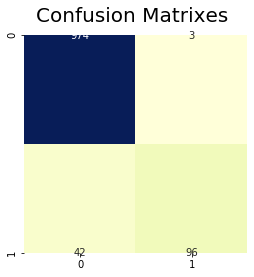

In [154]:
plt.figure(figsize=(4,4))

plt.suptitle("Confusion Matrixes",fontsize=20)

#plt.subplot(2,3,1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
sns.heatmap(cmm,cbar=False,annot=True,cmap="YlGnBu",fmt="d")

# SVM

In [158]:
clf = svm.SVC(kernel='linear') 
fit_svm=clf.fit(X_train, y_train)
y_pred = fit_svm.predict(X_test)


print("Accuracy:{0:0.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))
print("Recall:{0:0.2f}%".format(metrics.recall_score(y_test,y_pred,average='macro')*100))
print("Precision: {0:0.2f}%".format(metrics.precision_score(y_test,y_pred, average='macro')*100))

Accuracy:97.94%
Recall:91.67%
Precision: 98.85%


In [159]:
ssvm = confusion_matrix(y_test,y_pred)
print(ssvm)

[[977   0]
 [ 23 115]]


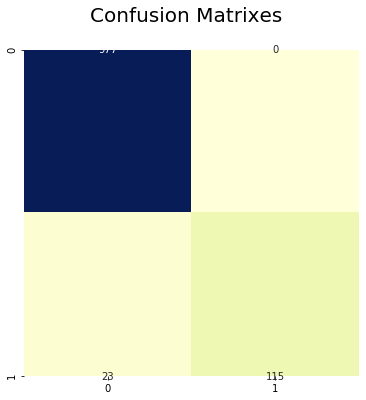

In [161]:
plt.figure(figsize=(6,6))

plt.suptitle("Confusion Matrixes",fontsize=20)

#plt.subplot(2,3,1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
sns.heatmap(ssvm,cbar=False,annot=True,cmap="YlGnBu",fmt="d")

# AdaBoostClassifier

In [165]:
email_train_data=AdaBoostClassifier()
email_train_data.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [166]:
y_predict=email_train_data.predict(X_test)

In [168]:
print("Accuracy:{0:0.2f}%".format(metrics.accuracy_score(y_test, y_predict)*100))
print("Recall:{0:0.2f}%".format(metrics.recall_score(y_test,y_predict,average='macro')*100))
print("Precision: {0:0.2f}%".format(metrics.precision_score(y_test,y_predict, average='macro')*100))

Accuracy:95.96%
Recall:88.05%
Precision: 92.66%


In [169]:
svm = confusion_matrix(y_test,y_pred)
print(svm)

[[977   0]
 [ 23 115]]


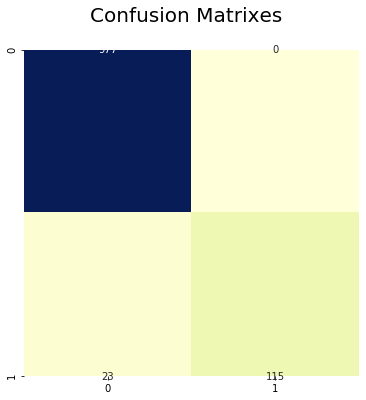

In [170]:
plt.figure(figsize=(6,6))

plt.suptitle("Confusion Matrixes",fontsize=20)

#plt.subplot(2,3,1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
sns.heatmap(svm,cbar=False,annot=True,cmap="YlGnBu",fmt="d")